In [ ]:
# Importação das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from warnings import simplefilter
import matplotlib.pyplot as plt
import seaborn as sns
simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR0hQmU3Uisi0SADlQShDKjuxxBk79bZomFjr7w1mJrpGmPf4LaFrxxhpsShqy1qi2rzZjlR42qsCjm/pub?gid=1707369827&single=true&output=csv')
#Usei a base de Dados sobre dados de Empréstimos disponibilizada pela Keagle, como não consegui importar pela API, fiz direto pelo Google Planilhas

### Projeto: Aplicação de Regressão Logística em Dados Reais:
Base de Dados: [ Empréstimos Bancários (Kaegle)](https://www.kaggle.com/datasets/udaymalviya/bank-loan-data/data.)

Aplicar os conhecimentos sobre regressão logística a um conjunto de dados real, compreendendo na prática os desafios de um projeto de modelagem preditiva, desde a escolha do dataset até a avaliação do desempenho do modelo.

Aluno: Luan Alysson de Souza

In [ ]:
df.head(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
df.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


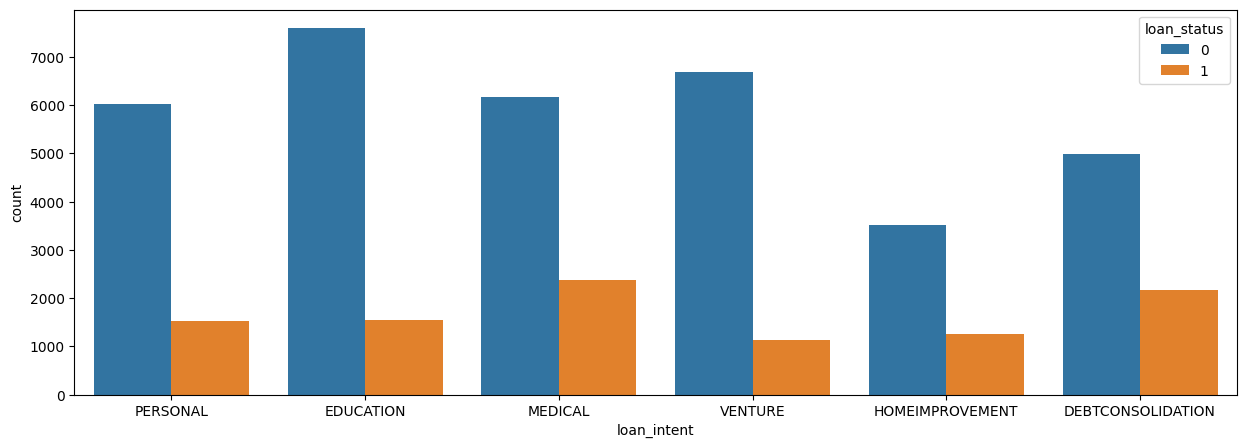

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='loan_intent', hue='loan_status');

<Axes: >

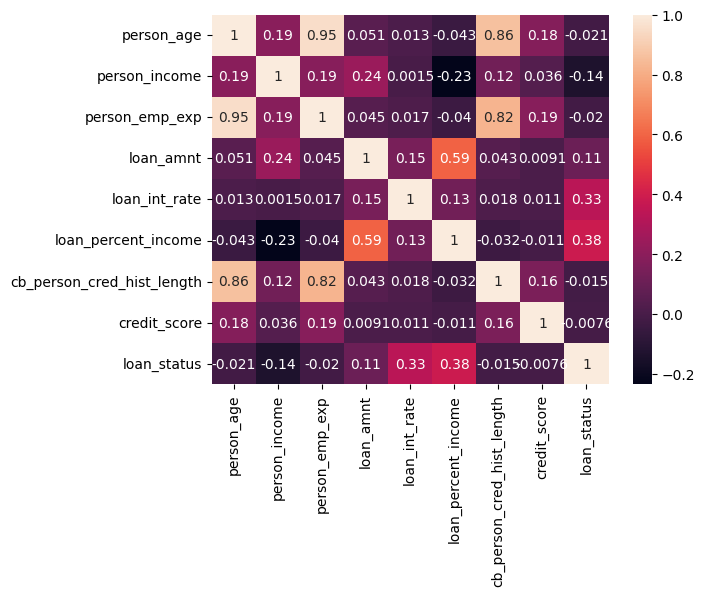

In [ ]:
num_varibles = df.select_dtypes(include = ['float64', 'int'])

cor_mat = num_varibles.corr()
sns.heatmap(data=cor_mat, annot=True)

In [ ]:
target = cor_mat['loan_status']
target.sort_values(ascending=False)


,loan_status
loan_status,1.000000
loan_percent_income,0.384880
loan_int_rate,0.332005
loan_amnt,0.107714
credit_score,-0.007647
cb_person_cred_hist_length,-0.014851
person_emp_exp,-0.020481
person_age,-0.021476
person_income,-0.135808


loan_status
0    35000
1    10000
Name: count, dtype: int64


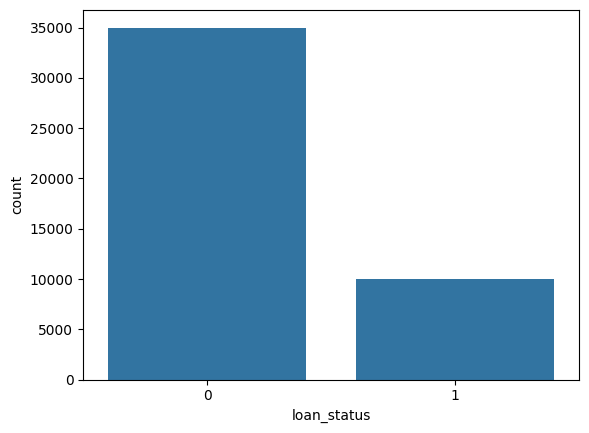

In [ ]:
print(df.value_counts('loan_status'));
sns.countplot(data=df, x='loan_status');

In [ ]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [ ]:
#categorizando colunas e convertendo dados
categorical_data = df.select_dtypes(exclude = ['float64', 'int64'])
target = pd.concat([df.select_dtypes(include = ['float64', 'int64']),
                   pd.get_dummies(categorical_data, dtype=float)], axis=1)

print(df.shape)
print(target.shape)

(45000, 14)
(45000, 28)


In [ ]:
aprovado = target[target['loan_status'] == 1]
nao_aprovado = target[target['loan_status'] == 0]

In [ ]:
print(aprovado.shape)
print(nao_aprovado.shape)

(10000, 28)
(35000, 28)


In [ ]:
nao_aprovado_sample = nao_aprovado.sample(n=15000)

In [ ]:
balanced_target = pd.concat([aprovado, nao_aprovado_sample], axis=0)
balanced_target.shape

(25000, 28)

In [ ]:
x = balanced_target.drop('loan_status', axis=1) #definindo as variáveis de teste (todas - o 'loan status' que é se foi aprovado ou não)
y = balanced_target['loan_status']

# axis = 1 compara os valores presentes em colunas e, da mesma forma, irá ordená-las

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
modelo = LogisticRegression(class_weight ='balanced') #criar modelo

In [ ]:
modelo.fit(X_train, Y_train) #treinar modelo

LogisticRegression(class_weight='balanced')

In [ ]:
y_pred = modelo.predict(X_test) #fazer previsões
y_prob = modelo.predict_proba(X_test)[:, 1]  # Probabilidade da classe 1

In [ ]:
# Avaliar
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      4505
           1       0.77      0.85      0.81      2995

    accuracy                           0.84      7500
   macro avg       0.83      0.84      0.83      7500
weighted avg       0.84      0.84      0.84      7500



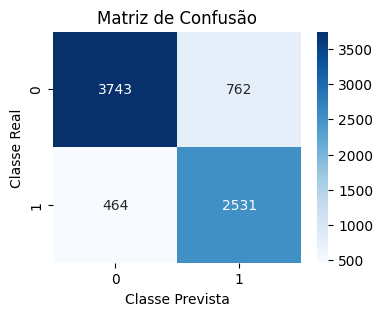

In [ ]:
# Matriz de Confusão
plt.figure(figsize=(4, 3))
conf_matrix = confusion_matrix(Y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()

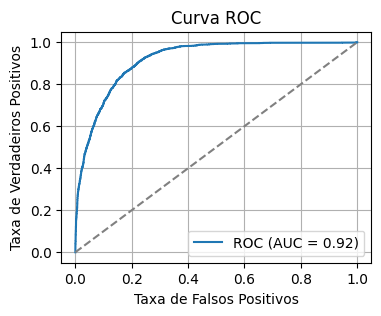

In [ ]:
# Curva ROC
plt.figure(figsize=(4, 3))
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curva ROC")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.legend()
plt.grid(True)
plt.show()

### Relatório de Entrega

Aluno: Luan Alysson de Souza
Turma: IA & LLM
Descrição do Problema:
Meu projeto é sobre Aprovação de Empréstimos de acordo com Perfil. (Bank Loan)
O problema a ser resolvido foi a aprovação desses empréstimos de acordo com diversos tipos de Perfis, por isso foi usado a Regressão Logística para avaliar
o Banco de Dados disponibilizado pelo banco para identificar a possível aprovação de acordo com uma Classificação Lógica.

Dados Avaliados: person_age	person_income	person_emp_exp	loan_amnt	loan_int_rate	loan_percent_income	cb_person_cred_hist_length	credit_score	loan_status (Idade, Salário, Valor do empréstimo, Crédito Score, % por Pessoa versus o fator Target (Alvo) que é o Status de Aprovaçao de acordo com essas variáveis.

Limpeza: Foi feito uma identificação dessas variáveis, foi feita uma conversão de caracteres e a modelagem dos dados para que todos pudessem estar aptos para o tratamento. Foi convertido e verificado com os gráficos para melhor visualização dos dados que foram tratados.

Foi realizado então o Balanceamento e em seguida a Regressão Logística desse
Dataset, entendo que poderia ter aparecido uma acurácia maior, mas nos testes que fizm, nos Balanceamentos que testei, foi esse que consegui uma melhor Performance. Acredito que uma melhor ou mais adequeada Parametrização resolveria o problema, mas isso me requer mais experiência. Porém fiquei
feliz com o resultado obtivo, mudei algumas variáveis, e concluí que este modelo
me da uma Acurácia de 92%. O que para o Cliente Banco, seria um grande retorno o Modelo feito de atividade.